<a href="https://colab.research.google.com/github/dsfdev2023/studentEvaluatiuon/blob/main/Extractor_Utility_Bill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Install Dependencies
!pip install pytesseract pdf2image
!apt-get install -y poppler-utils
!apt install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


# **FOR 1 Bill**

In [13]:
# Install Dependencies
!pip install PyPDF2

import PyPDF2
import re
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Provide the path to the PDF file on your Google Drive
pdf_path = '/content/drive/MyDrive/Bills UC/1451608-102 (2).pdf'  # Replace 'path_to_your_pdf.pdf' with the actual path

# Extract Text from PDF
with open(pdf_path, 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    text = ""
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        text += page.extract_text()

# ... [previous code]

# Updated Regex Patterns
pattern_format = r"(\d{7}-\d{3})"
total_payer_pattern = r"(\d{3,4},\d{2})"
date_limite_pattern = r"(\d{2}-\d{2}-\d{4})"

format_matches = re.findall(pattern_format, text)
total_payer_match = re.search(total_payer_pattern, text)
date_limite_match = re.search(date_limite_pattern, text)

# Assuming there are multiple matches for the format
# We'll grab the last for C.I.L and the first for Numéro de Client, ensuring they're different
cil_number = format_matches[-1] if len(format_matches) > 1 else "Not found"
numero_client = format_matches[0] if len(format_matches) > 1 and format_matches[0] != cil_number else "Not found"
total_payer = total_payer_match.group(1) if total_payer_match else "Not found"
date_limite = date_limite_match.group(1) if date_limite_match else "Not found"

print("C.I.L Number:", cil_number)
print("Total à Payer (Dirhams):", total_payer)
print("Date Limite de Paiement:", date_limite)
print("Numéro de Client:", numero_client)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
C.I.L Number: 1451608-102
Total à Payer (Dirhams): 387,23
Date Limite de Paiement: 04-05-2023
Numéro de Client: 1609595-001


# **FOR ALL BILLS**

In [15]:
# Install Dependencies
!pip install PyPDF2 tabulate

import PyPDF2
import re
from google.colab import drive
from os import listdir
from os.path import isfile, join
from tabulate import tabulate

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the folder containing PDF files
folder_path = '/content/drive/MyDrive/Bills UC'  # Replace 'path_to_your_folder' with the actual path

# Get all PDF files in the folder
pdf_files = [f for f in listdir(folder_path) if isfile(join(folder_path, f)) and f.lower().endswith('.pdf')]

results = []

# Iterate over each PDF file
for pdf_file in pdf_files:
    pdf_path = join(folder_path, pdf_file)
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    # Extract required information using Regex
    cil_pattern = r"(\d{7}-\d{3})"
    total_payer_pattern = r"(\d{3,4},\d{2})"
    date_limite_pattern = r"(\d{2}-\d{2}-\d{4})"

    format_matches = re.findall(cil_pattern, text)
    total_payer_match = re.search(total_payer_pattern, text)
    date_limite_match = re.search(date_limite_pattern, text)

    cil_number = format_matches[-1] if len(format_matches) > 1 else "Not found"
    numero_client = format_matches[0] if len(format_matches) > 1 and format_matches[0] != cil_number else "Not found"
    total_payer = total_payer_match.group(1) if total_payer_match else "Not found"
    date_limite = date_limite_match.group(1) if date_limite_match else "Not found"

    results.append([pdf_file, cil_number, total_payer, date_limite, numero_client])

# Display results using tabulate
headers = ["File Name", "C.I.L Number", "Total à Payer (Dirhams)", "Date Limite de Paiement", "Numéro de Client"]
print(tabulate(results, headers=headers, tablefmt='grid'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+---------------------+----------------+---------------------------+---------------------------+--------------------+
| File Name           | C.I.L Number   | Total à Payer (Dirhams)   | Date Limite de Paiement   | Numéro de Client   |
+=====================+================+===========================+===========================+====================+
| 1451608-102 (2).pdf | 1451608-102    | 387,23                    | 04-05-2023                | 1609595-001        |
+---------------------+----------------+---------------------------+---------------------------+--------------------+
| 1451608-102 (3).pdf | 1451608-102    | 626,95                    | 03-06-2023                | 1609595-001        |
+---------------------+----------------+---------------------------+---------------------------+--------------------+
| 1451608-102 (4).pdf | 1451608-102    | 439,

# **CHARTS: TOTAL A PAYER VS DATE LIMITE DE PAIEMENT**

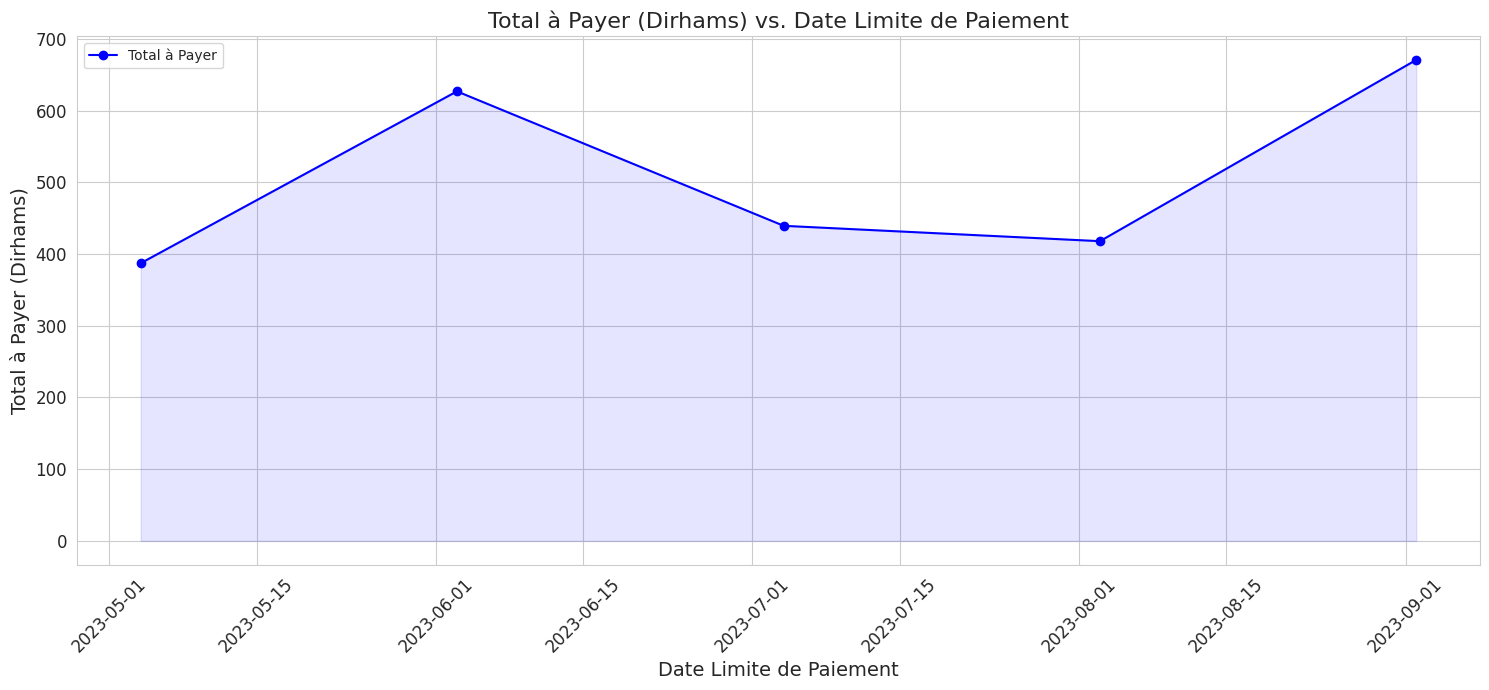

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Use seaborn style for a better looking plot
sns.set_style("whitegrid")
sns.set_palette("husl")

# Extract relevant columns from results
dates = [row[3] for row in results]
amounts = [row[2] for row in results]

# Convert "Total à Payer (Dirhams)" from strings with commas to floats
amounts = [float(amount.replace(',', '.')) for amount in amounts]

# Convert "Date Limite de Paiement" to datetime objects
dates = [datetime.strptime(date, "%d-%m-%Y") for date in dates]

# Plotting
plt.figure(figsize=(15, 7))

# Plot the data
plt.plot(dates, amounts, marker='o', linestyle='-', color='b', label="Total à Payer")
plt.fill_between(dates, amounts, color='b', alpha=0.1)

# Set title and labels
plt.title("Total à Payer (Dirhams) vs. Date Limite de Paiement", fontsize=16)
plt.xlabel("Date Limite de Paiement", fontsize=14)
plt.ylabel("Total à Payer (Dirhams)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Display the legend
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
import plotly.express as px
import pandas as pd

# Convert the dates and amounts to a pandas DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Total à Payer (Dirhams)': amounts
})

# Create the interactive plot using plotly
fig = px.line(df, x='Date', y='Total à Payer (Dirhams)', title='Total à Payer (Dirhams) vs. Date Limite de Paiement',
              labels={'Date': 'Date Limite de Paiement', 'Total à Payer (Dirhams)': 'Total à Payer (Dirhams)'})

# Show the plot
fig.show()


# **Exporting the Table:**

In [19]:
# Convert results to a pandas DataFrame
df_table = pd.DataFrame(results, columns=["File Name", "C.I.L Number", "Total à Payer (Dirhams)", "Date Limite de Paiement", "Numéro de Client"])

# Save to CSV
df_table.to_csv('/content/drive/MyDrive/Bills UC/results_table.csv', index=False)

# Save as Excel:
df_table.to_excel('/content/drive/MyDrive/Bills UC/results_table.xlsx', index=False)


# **Exporting the Graphs:**

> Interractive HTML



In [30]:
fig.write_html('/content/drive/MyDrive/Boa/plotly_graph.html')
